# Notebook Imports

In [77]:
from numpy import exp
from numpy.random import randn
from feature_engine import transformation as vt
import pandas as pd
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt

# Generate sample data

In [78]:
data = randn(999)
data[:5]

array([-0.63015095,  0.43615964, -1.23725541, -1.25396428,  0.47201494])

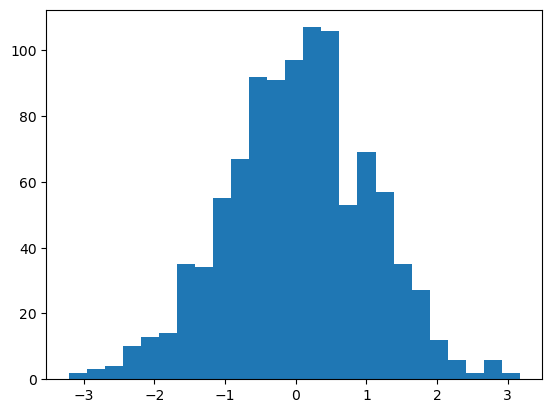

In [79]:
plt.hist(data, bins = 25)
plt.show()

In [80]:
# add a skew to the generated data points
data_skew = exp(data)
data_skew[:5]

array([0.53251141, 1.54675569, 0.29017955, 0.28537126, 1.60322134])

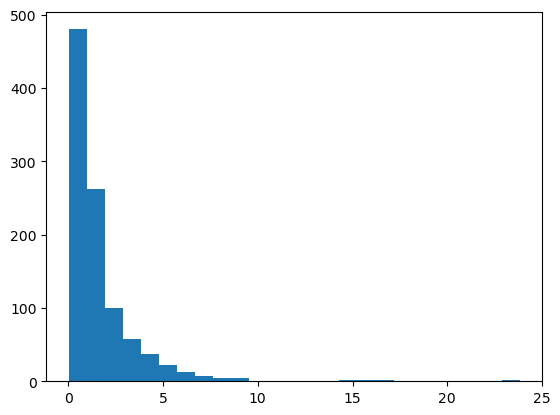

In [81]:
plt.hist(data_skew, bins = 25)
plt.show()

In [82]:
data_skew.shape

(999,)

In [83]:
# convert the data into a dataframe
data_skew = data_skew.reshape((len(data), 1))
df_skew = pd.DataFrame(data_skew, columns=['Value'])
df_skew.head()

,Value
0,0.532511
1,1.546756
2,0.290180
3,0.285371
4,1.603221


# Log Transformer

In [84]:
# generate and fit log transformer 
lgt = vt.LogTransformer(variables= ['Value'])
lgt.fit(df_skew)

# apply log transformation 
data_lg = lgt.transform(df_skew)
data_lg.head()

,Value
0,-0.630151
1,0.436160
2,-1.237255
3,-1.253964
4,0.472015


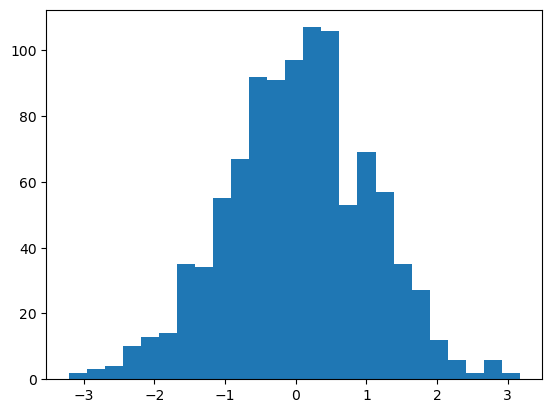

In [85]:
# plot the distribution of the transformed data
plt.hist(data_lg['Value'], bins=25)
plt.show()

# Quantile Transformer

In [86]:
# generate and fit quantile transformer
qt = QuantileTransformer(output_distribution='normal')
qt.fit(df_skew[['Value']])

# apply quantile transformation 
data_q = qt.transform(df_skew[['Value']])
data_q[:5]

C:\Users\fatima\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (999). n_quantiles is set to n_samples.
  warnings.warn(


array([[-0.69833144],
       [ 0.42430597],
       [-1.27473004],
       [-1.2804105 ],
       [ 0.47151284]])

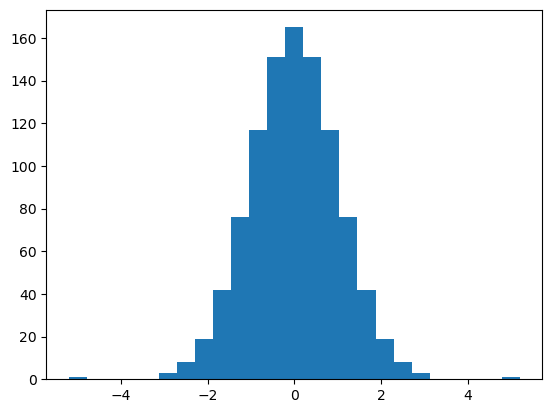

In [87]:
# plot the distribution of the transformed data
plt.hist(data_q, bins=25)
plt.show()